# Análisis de Incumplimiento de Préstamos mediante Métodos de Deep Learning

## Introducción al Problema

La capacidad de prever si un préstamo terminará en incumplimiento es esencial en el análisis financiero. En este proyecto, se busca desarrollar un modelo de aprendizaje profundo utilizando datos recopilados entre 2007 y 2015. El conjunto de datos presenta desequilibrios significativos y abarca diversas características.

## Contexto: Aplicación de Métodos de Deep Learning en Finanzas

## Objetivo del Análisis

Realizar un proceso exhaustivo de preprocesamiento de datos y construir un modelo predictivo para evaluar la probabilidad de incumplimiento de préstamos.

## Resumen del Conjunto de Datos (Dataset - Datos de Préstamos de Lending Club)

**Columnas y Definiciones del Conjunto de Datos:**

- **credit.policy:** 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com y 0 en caso contrario.
- **purpose:** El propósito del préstamo (por ejemplo, "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", y "all_other").
- **int.rate:** La tasa de interés del préstamo, como proporción.
- **installment:** Las cuotas mensuales adeudadas por el prestatario si el préstamo se financia.
- **log.annual.inc:** El logaritmo natural del ingreso anual autoinformado del prestatario.
- **dti:** La relación deuda-ingresos del prestatario.
- **fico:** La puntuación de crédito FICO del prestatario.
- **days.with.cr.line:** El número de días que el prestatario ha tenido una línea de crédito.
- **revol.bal:** El saldo rotativo del prestatario al final del ciclo de facturación de la tarjeta de crédito.
- **revol.util:** La tasa de utilización de la línea rotativa del prestatario.
- **inq.last.6mths:** El número de consultas del prestatario por parte de acreedores en los últimos 6 meses.
- **delinq.2yrs:** El número de veces que el prestatario ha estado 30+ días atrasado en un pago en los últimos 2 años.
- **pub.rec:** El número de registros públicos derogatorios del prestatario (quiebras, gravámenes fiscales o juicios).

## Metodología:

### Transformación de Características

Se realizará una transformación de características para convertir valores categóricos en valores numéricos discretos. Esto es esencial para permitir que el modelo de Deep Learning trabaje con todas las características de manera efectiva.

### Análisis Exploratorio de Datos (EDA)

Se llevará a cabo un análisis exploratorio de datos para explorar diferentes factores dentro del conjunto de datos. Esto incluirá la visualización de distribuciones, estadísticas descriptivas y la identificación de posibles patrones o tendencias.

### Ingeniería de Características 

Se realizará verificaciones las correlaciones entre las diferentes características. Aquellas con una fuerte correlación se identificarán y se considerará su eliminación para reducir el número de características, conservando solo aquellas más relevantes para el análisis.

### Modelado
Se construirá un modelo de Deep Learning utilizando la biblioteca TensorFlow. Este paso se realizará después de aplicar la transformación de características y realizar el análisis de los datos. 

El objetivo es desarrollar un modelo capaz de predecir la probabilidad de incumplimiento de préstamos futuros.


### Importante !!!

Este código se basa en el notebook de Kaggle titulado "Lending Club Loan Data Deep Learning (93% Accuracy)" creado por Deependra Verma. 

Puedes encontrar el notebook original en el siguiente enlace:
https://www.kaggle.com/code/deependraverma13/lending-club-loan-data-deep-learning-93-accuracy/notebook


In [1]:
# Importa la biblioteca de advertencias para controlar las advertencias
import warnings

# Bibliotecas para la carga y gestión de datos
import pandas as pd  # Para la manipulación de datos
import numpy as np  # Para operaciones matemáticas

# Bibliotecas para la exploración de datos
import matplotlib.pyplot as plt  # Para la visualización de datos
import seaborn as sns  # Para la visualización de datos
from scipy import stats  # Para estadísticas

# Bibliotecas para la manipulación de datos, ingeniería de características y aprendizaje automático
from sklearn import preprocessing  # Para la preprocesamiento de datos
from sklearn.feature_selection import chi2, RFE  # Para la selección de características
from sklearn.impute import SimpleImputer  # Para la imputación de datos
from sklearn.linear_model import LogisticRegression  # Para el modelo de regresión logística
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # Para la normalización y codificación de datos
from sklearn.utils import resample, shuffle  # Para remuestrear y mezclar los datos

# Bibliotecas para el aprendizaje profundo
import tensorflow as tf  # Para el aprendizaje profundo
from tensorflow import keras  # Para el aprendizaje profundo
from tensorflow.keras.models import Sequential  # Para la creación de modelos secuenciales
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout  # Para las capas de los modelos
from tensorflow.keras.optimizers import Adam  # Para el optimizador Adam
from tensorflow.keras.callbacks import EarlyStopping  # Para detener el entrenamiento cuando una métrica deja de mejorar

# Bibliotecas para las métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Para las métricas de clasificación

# Configura las advertencias para que sean ignoradas
warnings.filterwarnings("ignore")

### Carga de datos y vista previa del conjunto de datos:
En esta sección, se realizarán operaciones relacionadas con la carga inicial de datos y se mostrará una vista previa para tener una comprensión inicial del conjunto de datos.

In [2]:
# Carga el conjunto de datos 'loan_data.csv' 
data = pd.read_csv("loan_data.csv")

data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
# Forma del DataFrame (número de filas, número de columnas)
data.shape

(9578, 14)

In [4]:
# Muestra el tipo de datos de cada columna y la cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Transformar valores categóricos en valores numéricos:

In [5]:
# Convierte la columna categórica 'purpose' en columnas dummy/indicadoras. 
# Cada valor único en la columna 'purpose' se convierte en una nueva columna en el DataFrame y se llena con 1 y 0 para indicar la presencia de ese valor en la fila original.
data = pd.get_dummies(data, columns = ["purpose"])

In [6]:
data.shape

(9578, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

<Axes: xlabel='not.fully.paid'>

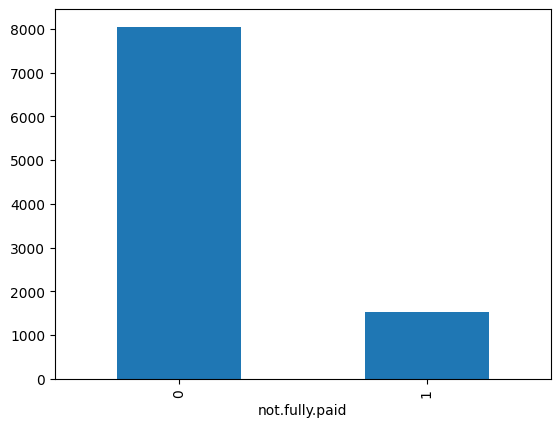

In [8]:
# Crea un gráfico de barras que muestra la distribución de los valores en la columna 'not.fully.paid'.
# Esto es útil para visualizar la distribución de los valores en esta columna.
data["not.fully.paid"].value_counts().plot(kind = "bar")

In [9]:
# Divide el DataFrame en dos subconjuntos basados en los valores de la columna 'not.fully.paid'
# Imprime la forma de cada subconjunto para mostrar la cantidad de filas que contienen
not_fully_paid_0 = data[data["not.fully.paid"] == 0]  # Subconjunto de filas donde 'not.fully.paid' es 0
print('not_fully_paid_0', not_fully_paid_0.shape)

not_fully_paid_1 = data[data["not.fully.paid"] == 1]  # Subconjunto de filas donde 'not.fully.paid' es 1
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 20)
not_fully_paid_1 (1533, 20)


In [10]:
# Realiza un sobremuestreo de la clase minoritaria (donde 'not.fully.paid' es 1) utilizando la función 'resample' de sklearn
# 'replace = True' significa que se permite el muestreo con reemplazo
# 'n_samples = 8045' especifica el número de muestras para generar
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)

# Combina el conjunto de datos sobremuestreado con el conjunto de datos original (donde 'not.fully.paid' es 0)
df = pd.concat([not_fully_paid_0, df_minority_upsampled])

# Mezcla las filas del DataFrame resultante para asegurar que las clases están bien mezcladas
df = shuffle(df)

<Axes: xlabel='not.fully.paid'>

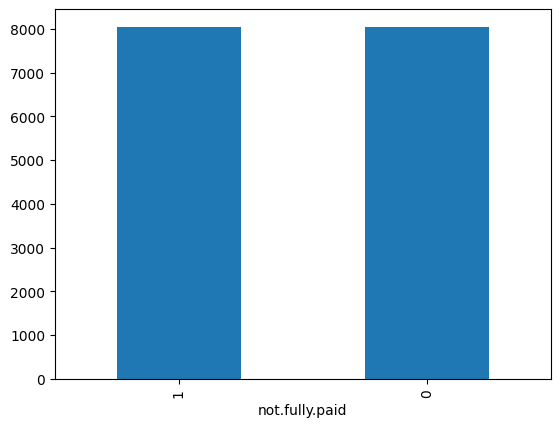

In [11]:
# Crea un gráfico de barras que muestra la distribución de los valores en la columna 'not.fully.paid'.
# Esto se hace para visualizar que el desequilibrio de datos ha sido manejado correctamente.
df["not.fully.paid"].value_counts().plot(kind = "bar")

In [12]:
df.shape

(16090, 20)

In [13]:
# Genera estadísticas descriptivas.
# Estas incluyen: el conteo de filas, la media, la desviación estándar, el valor mínimo, los percentiles 25, 50 y 75, y el valor máximo.
# '.T' transpone el DataFrame resultante para una mejor visualización.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,16090.0,0.746551,0.434999,0.000000,0.000000,1.000000,1.000000,1.000000e+00
int.rate,16090.0,0.126573,0.026832,0.060000,0.109900,0.126100,0.143800,2.164000e-01
installment,16090.0,329.869050,214.633539,15.670000,166.580000,278.555000,464.170000,9.401400e+02
log.annual.inc,16090.0,10.914333,0.635869,7.547502,10.518673,10.915088,11.289782,1.452835e+01
dti,16090.0,12.787957,6.929602,0.000000,7.330000,12.875000,18.227500,2.996000e+01
fico,16090.0,705.541019,37.088954,612.000000,677.000000,702.000000,727.000000,8.270000e+02
days.with.cr.line,16090.0,4477.130169,2460.706731,178.958333,2760.270833,4080.000000,5670.041667,1.763996e+04
revol.bal,16090.0,18502.542200,43756.623415,0.000000,3192.250000,8509.000000,18804.750000,1.207359e+06
revol.util,16090.0,48.788496,29.153510,0.000000,25.000000,49.200000,72.800000,1.190000e+02
inq.last.6mths,16090.0,1.885084,2.562131,0.000000,0.000000,1.000000,3.000000,3.300000e+01


### Análisis exploratorio de datos de diferentes factores del conjunto de datos:

Durante esta exploración, se examinarán y describirán las características del conjunto de datos con el objetivo de obtener información y comprensión de patrones, distribuciones y relaciones.

In [14]:
# Calcula la asimetría (skewness) de cada columna.
# La asimetría es una medida de la falta de simetría en la distribución de los datos.
# Un valor de asimetría de 0 indica una distribución simétrica.
# Un valor de asimetría positivo indica una cola a la derecha, mientras que un valor negativo indica una cola a la izquierda.
df.skew()

credit.policy                 -1.133709
int.rate                       0.179211
installment                    0.878244
log.annual.inc                 0.043213
dti                            0.004576
fico                           0.560671
days.with.cr.line              1.118206
revol.bal                     14.131973
revol.util                    -0.021794
inq.last.6mths                 3.545283
delinq.2yrs                    5.167561
pub.rec                        4.190547
not.fully.paid                 0.000000
purpose_all_other              1.156149
purpose_credit_card            2.437362
purpose_debt_consolidation     0.387993
purpose_educational            4.731157
purpose_home_improvement       3.388421
purpose_major_purchase         4.664981
purpose_small_business         3.032919
dtype: float64

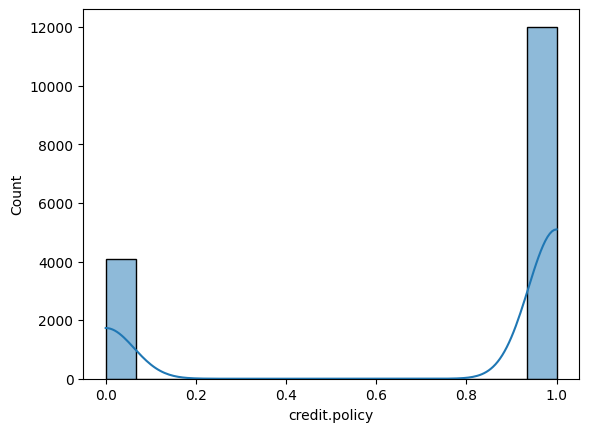

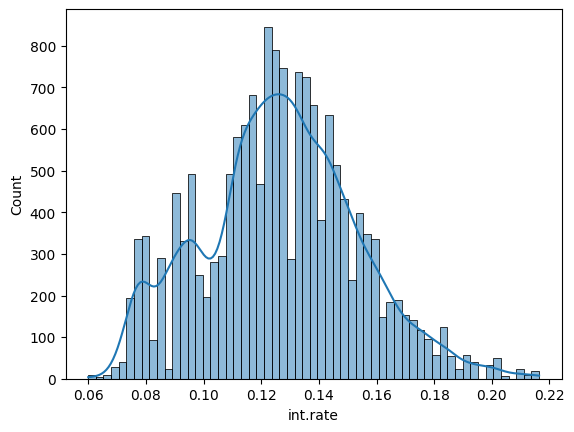

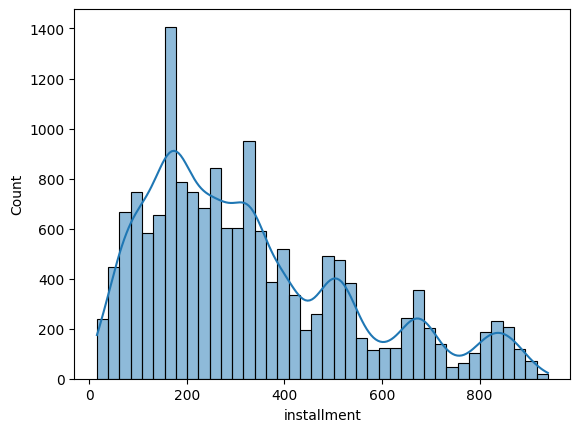

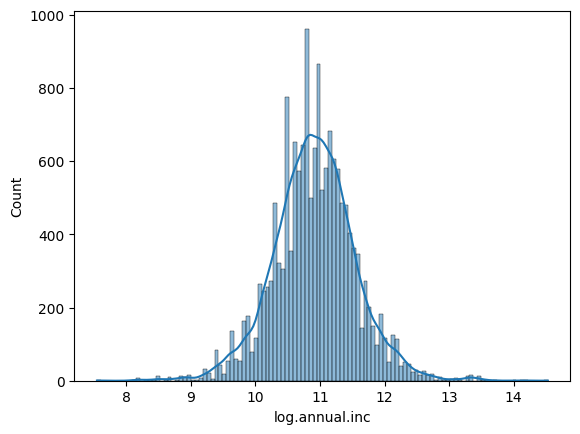

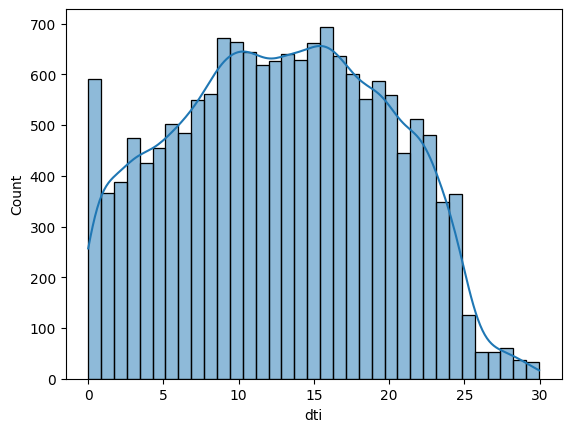

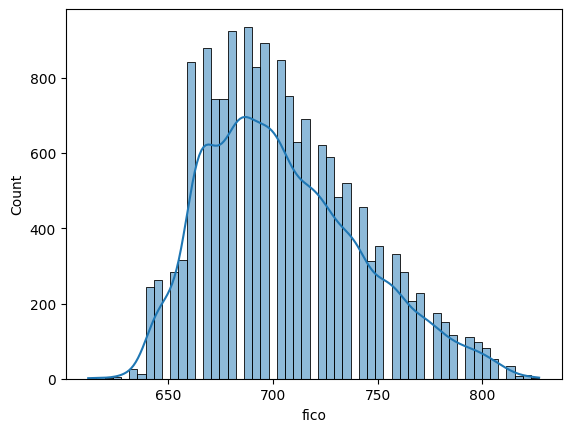

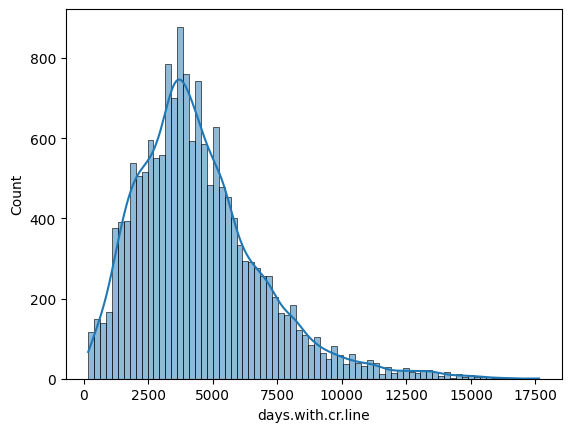

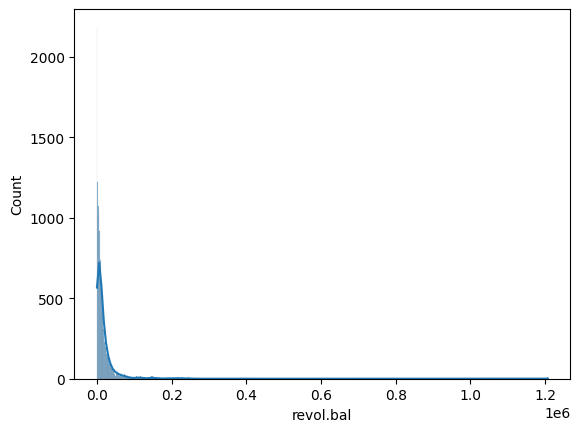

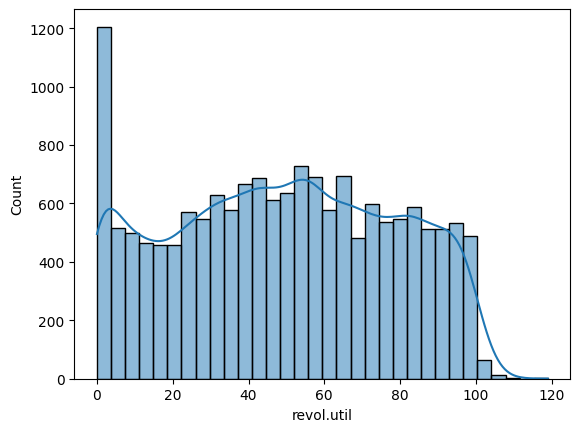

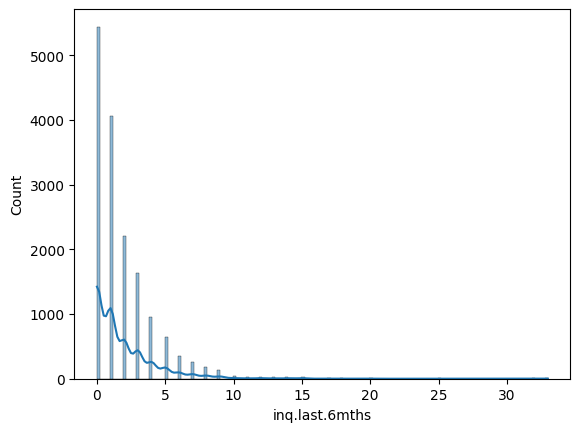

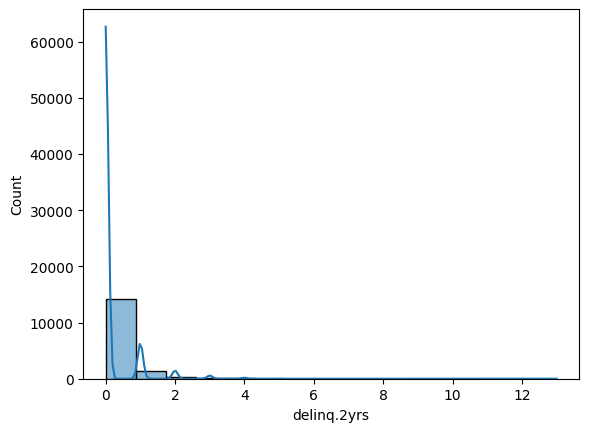

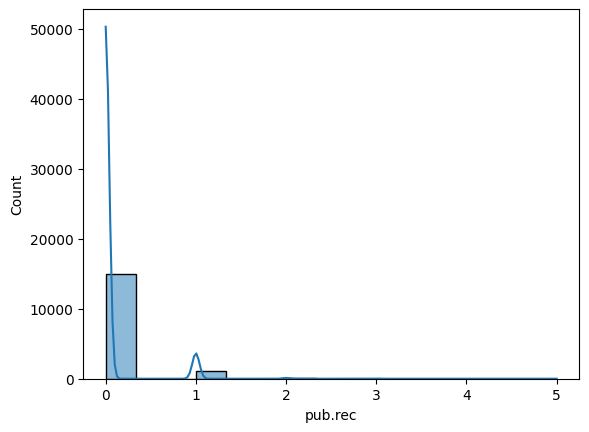

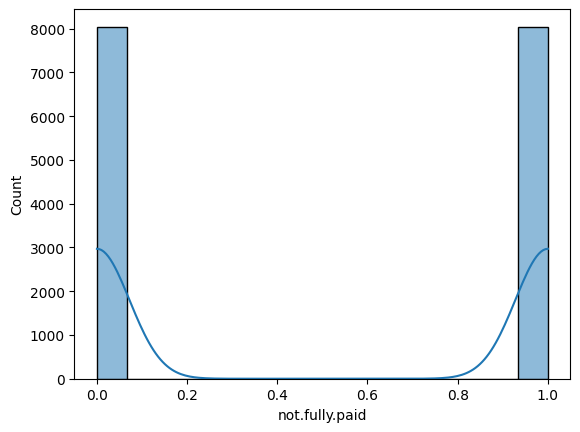

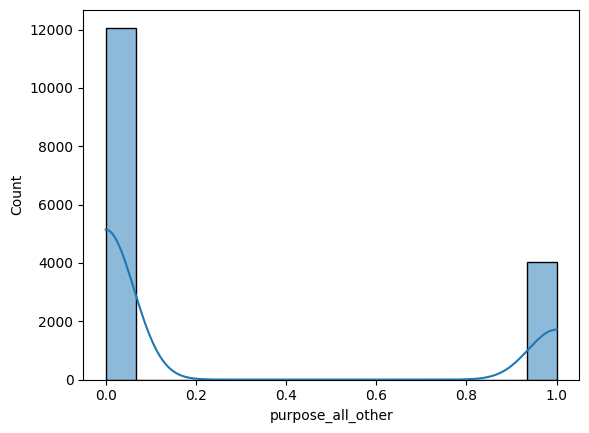

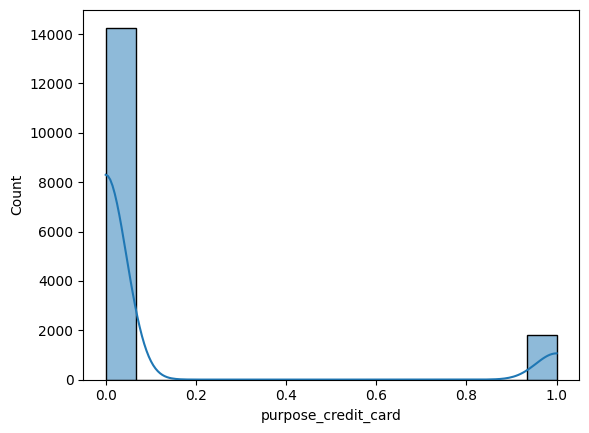

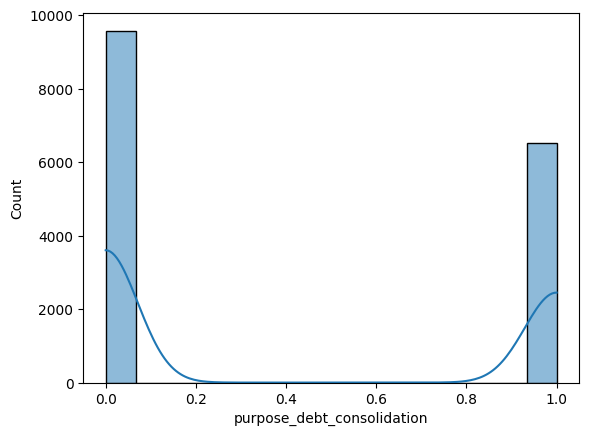

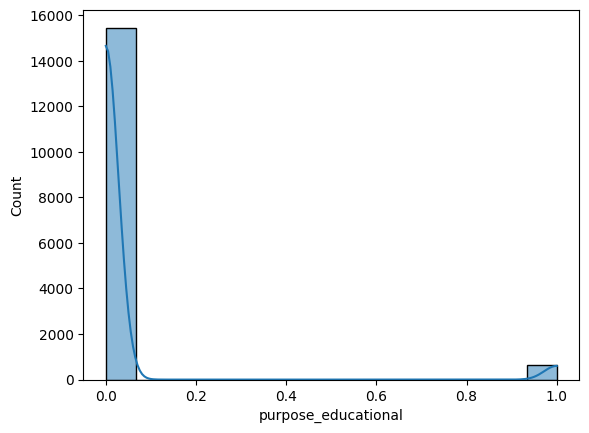

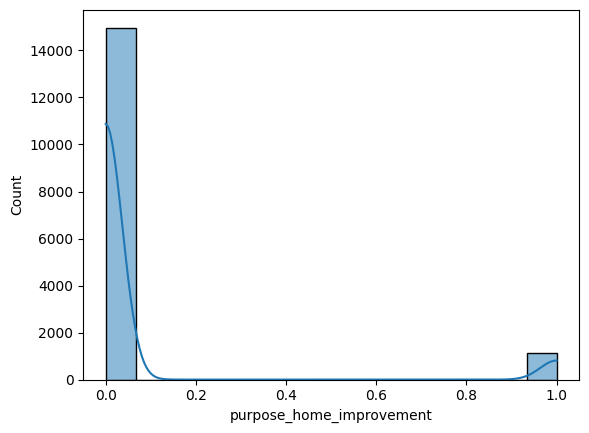

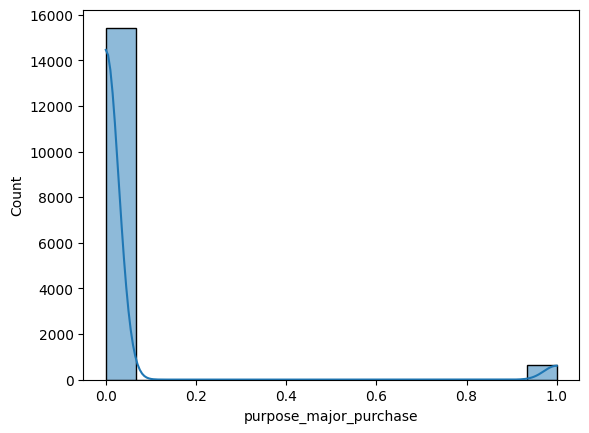

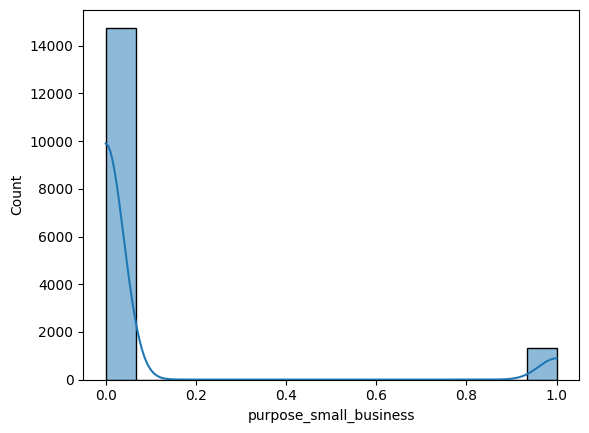

In [15]:
# Itera sobre cada columna en el DataFrame 'df'
for column in df.columns:
    # Genera un histograma de la columna actual utilizando seaborn
    # 'kde = True' añade una estimación de la densidad del kernel al histograma
    sns.histplot(df[column], kde = True)
    
    # Muestra el gráfico
    plt.show()

<Axes: >

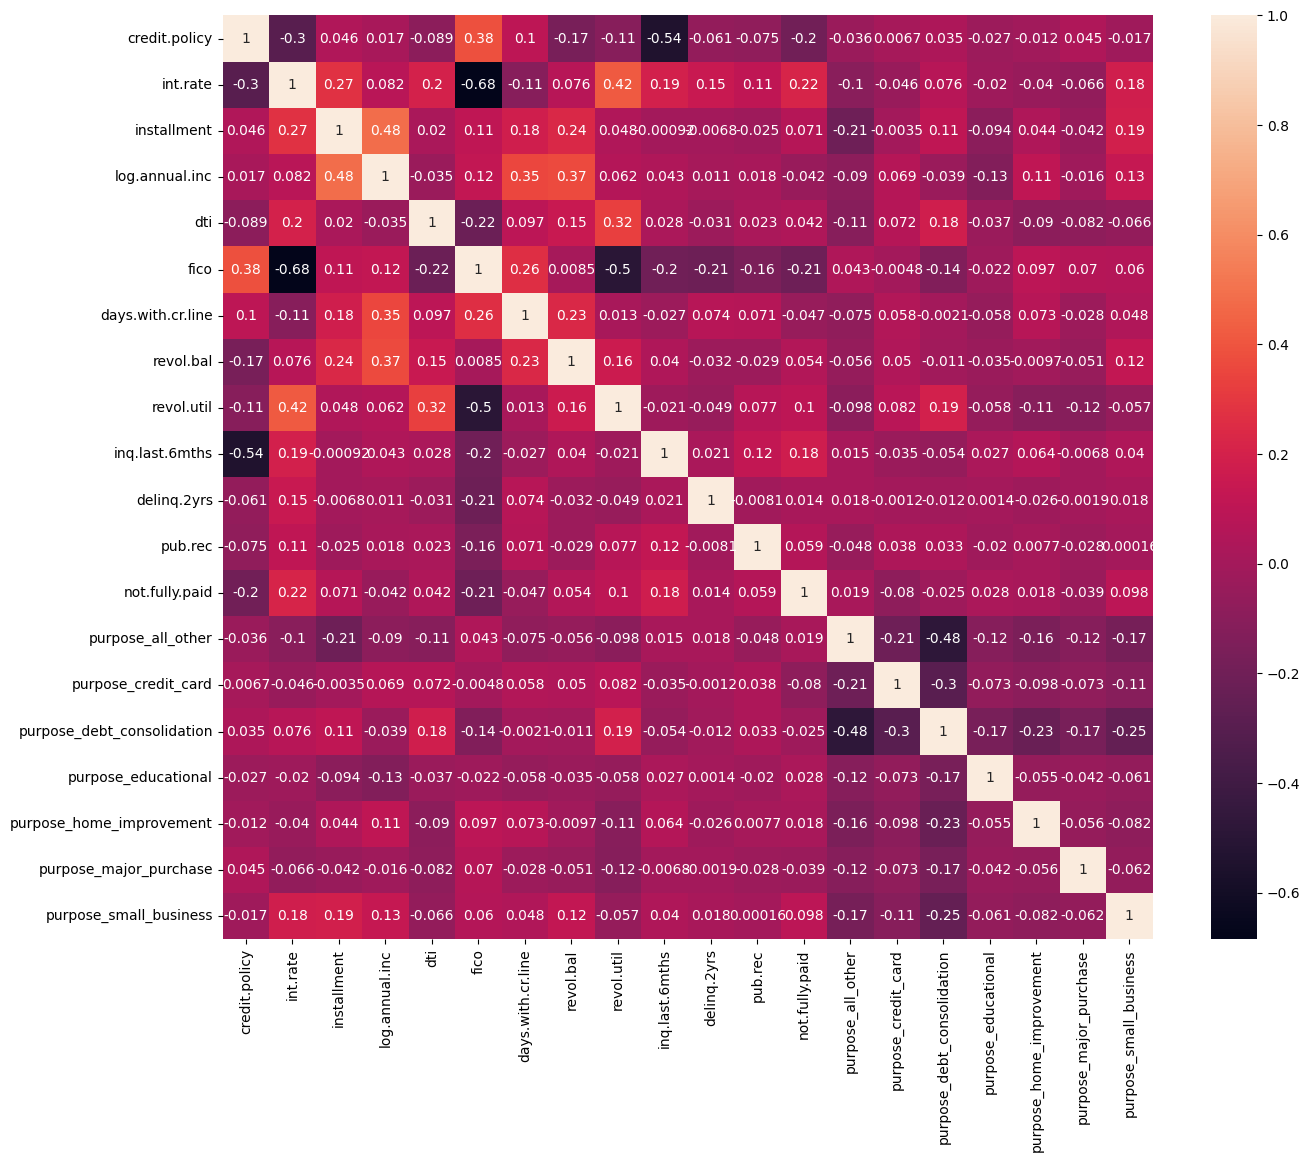

In [16]:
# Selecciona las columnas del DataFrame cuya asimetría está entre 0 y 1
# Estas columnas tienen una distribución cercana a la normal
df.columns[(df.skew() < 1) & (df.skew() > 0)]

# Crea la matriz de correlación
matrix = df.corr()

# Crea un mapa de calor de la matriz de correlación utilizando seaborn
# 'annot = True' añade anotaciones a las celdas del mapa de calor
plt.figure(figsize = (15, 12))
sns.heatmap(data= df.corr(), annot= True)

In [17]:
# Desapila la matriz de correlación, creando pares de características
cor_pairs = matrix.unstack()

# Ordena los pares de correlación
sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')

# Selecciona los pares de correlación fuerte, donde la correlación absoluta es mayor que 0.5
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

# Imprime los pares de correlación fuerte
strong_pairs

int.rate                    fico                         -0.684873
fico                        int.rate                     -0.684873
credit.policy               inq.last.6mths               -0.543823
inq.last.6mths              credit.policy                -0.543823
credit.policy               credit.policy                 1.000000
purpose_home_improvement    purpose_home_improvement      1.000000
int.rate                    int.rate                      1.000000
installment                 installment                   1.000000
log.annual.inc              log.annual.inc                1.000000
dti                         dti                           1.000000
fico                        fico                          1.000000
days.with.cr.line           days.with.cr.line             1.000000
revol.bal                   revol.bal                     1.000000
purpose_major_purchase      purpose_major_purchase        1.000000
revol.util                  revol.util                    1.00

### Generación de conjuntos de entrenamiento y prueba

In [18]:
# Imprime las columnas del DataFrame 'df'
df.columns

# Divide el DataFrame en características (X) y objetivo (y)
X = df.drop("not.fully.paid", axis = 1)  # Características
y = df["not.fully.paid"]  # Objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
# 'test_size = 0.2' especifica que el 20% de los datos se utilizarán para el conjunto de prueba
# 'random_state = 100' asegura que la división es reproducible
# 'stratify = y' asegura que la división es estratificada con respecto a la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

In [19]:
# Crea una instancia de la clase 'StandardScaler'
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y luego transforma los datos de entrenamiento
# 'fit_transform' primero ajusta el modelo a los datos y luego transforma los datos en una sola etapa
X_train_s = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el escalador ajustado a los datos de entrenamiento
# Es importante utilizar el mismo escalador para los datos de entrenamiento y prueba para asegurar que se aplican las mismas transformaciones
X_test_s = scaler.transform(X_test)

In [20]:
X_train_s.shape

(12872, 19)

### modelado y entrenamiento del modelo:
El modelo tiene dos capas ocultas, cada una con 256 neuronas y una función de activación ReLU. También se aplica un dropout del 30% después de cada capa oculta para reducir el sobreajuste. La capa de salida tiene una sola neurona con una función de activación sigmoide, lo que es apropiado para un problema de clasificación binaria. Aquí está la documentación detallada:

In [21]:
# Crea un modelo secuencial de Keras
model = Sequential()

# Añade la primera capa oculta con 256 neuronas y función de activación ReLU
# 'input_shape = [19]' especifica que cada entrada tiene 19 características
model.add(keras.layers.Dense(256, activation = "relu", input_shape = [19]))

# Añade una capa de dropout con una tasa de 0.3
# El dropout es una técnica de regularización que ayuda a prevenir el sobreajuste
model.add(keras.layers.Dropout(0.3))

# Añade la segunda capa oculta con 256 neuronas y función de activación ReLU
model.add(keras.layers.Dense(256, activation = "relu"))

# Añade otra capa de dropout con una tasa de 0.3
model.add(keras.layers.Dropout(0.3))

# Añade la capa de salida con una sola neurona y función de activación sigmoide
# La función de activación sigmoide es apropiada para un problema de clasificación binaria
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [22]:
# Compila el modelo de red neuronal
# 'optimizer = "Adam"' especifica que se utilizará el optimizador Adam
# 'loss = "binary_crossentropy"' especifica que se utilizará la entropía cruzada binaria como función de pérdida
# 'metrics = ["accuracy"]' especifica que se utilizará la precisión como métrica para evaluar el rendimiento del modelo
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Imprime un resumen del modelo
# El resumen incluye el número de parámetros entrenables en el modelo, así como los detalles de cada capa
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 71169 (278.00 KB)
Trainable params: 71169 (278.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Crea una instancia de EarlyStopping
# 'monitor = "val_loss"' especifica que se debe monitorizar la pérdida de validación para el paro temprano
# 'patience = 10' especifica que el entrenamiento se detendrá si la pérdida de validación no mejora después de 10 épocas
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

# Entrena el modelo de red neuronal con el callback de paro temprano
result = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    batch_size=256,
    epochs=1000,
    verbose=1,
    callbacks=[early_stopping],  # Pasa el callback de paro temprano a la función fit
)

Epoch 1/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6179 - val_loss: 0.6349 - val_accuracy: 0.6299
Epoch 2/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6356 - val_loss: 0.6300 - val_accuracy: 0.6370
Epoch 3/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6377 - val_loss: 0.6261 - val_accuracy: 0.6414
Epoch 4/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.6512 - val_loss: 0.6274 - val_accuracy: 0.6516
Epoch 5/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6517 - val_loss: 0.6216 - val_accuracy: 0.6495
Epoch 6/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6585 - val_loss: 0.6191 - val_accuracy: 0.6482
Epoch 7/1000
51/51 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6615 - val_loss: 0.6165 - val_accuracy: 0.6520
Epoch 

In [24]:
# Hace predicciones en los datos de prueba utilizando el modelo entrenado
# Las predicciones son binarizadas en 0 o 1 basándose en un umbral de 0.5
predictions =(model.predict(X_test_s)>0.5).astype("int32")

# Calcula la precisión de las predicciones comparándolas con las etiquetas verdaderas
# 'accuracy_score' es una función de sklearn que calcula la precisión de las predicciones
accuracy = accuracy_score(y_test, predictions)

# Imprime la precisión
print(accuracy)

101/101 [==============================] - 0s 334us/step
0.9073958980733374


In [25]:
# Imprime un informe de clasificación utilizando la función 'classification_report' de sklearn
# 'y_test' son las etiquetas verdaderas
# 'predictions' son las predicciones hechas por el modelo
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1609
           1       0.86      0.98      0.91      1609

    accuracy                           0.91      3218
   macro avg       0.92      0.91      0.91      3218
weighted avg       0.92      0.91      0.91      3218



### El informe de clasificación proporciona varias métricas que pueden ayudar a evaluar el rendimiento del modelo y dado el contexto del modelo está diseñado para predecir la probabilidad de incumplimiento de préstamos, se puede observar:

1. **Precision vs Recall**: En el contexto de préstamos, la precisión (proporción de predicciones positivas correctas entre todas las predicciones positivas) puede ser crucial para garantizar que las decisiones de clasificación positiva sean confiables. Al mismo tiempo, el recall (proporción de instancias positivas reales identificadas correctamente entre todas las instancias positivas reales) es importante para asegurarse de que el modelo identifique la mayor cantidad posible de préstamos que realmente incumplirán.

2. **F1-Score**: Dado que el F1-Score es la media armónica de la precisión y el recall, es una métrica útil para encontrar un equilibrio entre ambos. Un alto F1-Score sugiere que el modelo tiene un buen equilibrio entre precisión y recall.

3. **Accuracy (Exactitud)**: La exactitud general del 92% es un buen indicador.
4. **Soporte (Soporte)**: El soporte muestra que hay un número igual de instancias para ambas clases en el conjunto de datos de prueba, lo que es útil para comprender la distribución de las clases.

En resumen, el rendimiento general del modelo es sólido, pero es esencial considerar las necesidades específicas del problema de predicción de incumplimiento de préstamos. Puede ser útil ajustar los umbrales de clasificación según los requisitos del negocio y, posiblemente,la interpretación de las métricas debe estar alineada con los objetivos y riesgos asociados con las decisiones de préstamos.


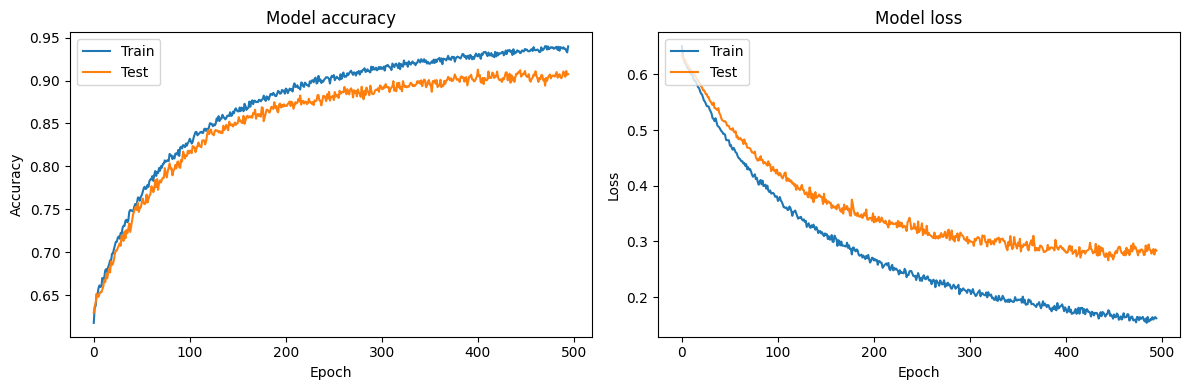

In [26]:
# Crea una nueva figura con un tamaño específico
plt.figure(figsize=(12, 4))

# Crea el primer subgráfico para la precisión del modelo
plt.subplot(1, 2, 1)
# Grafica la precisión del entrenamiento
plt.plot(result.history['accuracy'])
# Grafica la precisión de la validación
plt.plot(result.history['val_accuracy'])
# Añade un título al gráfico
plt.title('Model accuracy')
# Añade etiquetas a los ejes
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# Añade una leyenda al gráfico
plt.legend(['Train', 'Test'], loc='upper left')

# Crea el segundo subgráfico para la pérdida del modelo
plt.subplot(1, 2, 2)
# Grafica la pérdida del entrenamiento
plt.plot(result.history['loss'])
# Grafica la pérdida de la validación
plt.plot(result.history['val_loss'])
# Añade un título al gráfico
plt.title('Model loss')
# Añade etiquetas a los ejes
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Añade una leyenda al gráfico
plt.legend(['Train', 'Test'], loc='upper left')

# Ajusta el diseño para evitar la superposición
plt.tight_layout()
# Muestra los gráficos
plt.show()